In [1]:
import bin.executor.executor

In [2]:
def main():
    executor = bin.executor.executor.Executor()
    executor.execute_full_flow()

**<div style='text-align: center;'><span style='color:white; font-size:24px; text-align:center'>1. Prepare test, train and validation data</span></div>**

Execution time: 0.02s


**<span style='color:white'>**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**</span>**

**<div style='text-align: center;'><span style='color:white; font-size:24px; text-align:center'>2. Load test, train and validation data into memory</span></div>**

Execution time: 439.31s


**<span style='color:white'>**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**</span>**

**<div style='text-align: center;'><span style='color:white; font-size:24px; text-align:center'>3. Create and compile CNN model</span></div>**

Execution time: 0.09s


**<span style='color:white'>**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**</span>**

**<div style='text-align: center;'><span style='color:white; font-size:24px; text-align:center'>4. Train CNN model</span></div>**

Epoch 1/10
591/591 [==============================] - 21s 35ms/step - loss: 1.1058 - accuracy: 0.5858 - val_loss: 0.7415 - val_accuracy: 0.7441
Epoch 2/10
591/591 [==============================] - 21s 35ms/step - loss: 0.6955 - accuracy: 0.7485 - val_loss: 0.5596 - val_accuracy: 0.8048
Epoch 3/10
591/591 [==============================] - 20s 34ms/step - loss: 0.5760 - accuracy: 0.7916 - val_loss: 0.6364 - val_accuracy: 0.7809
Epoch 4/10
591/591 [==============================] - 20s 34ms/step - loss: 0.4940 - accuracy: 0.8264 - val_loss: 0.5130 - val_accuracy: 0.8120
Epoch 5/10
591/591 [==============================] - 20s 34ms/step - loss: 0.4524 - accuracy: 0.8399 - val_loss: 0.6712 - val_accuracy: 0.7752
Epoch 6/10
591/591 [==============================] - 20s 34ms/step - loss: 0.3830 - accuracy: 0.8646 - val_loss: 0.6195 - val_accuracy: 0.7837
Epoch 7/10
591/591 [==============================] - 20s 34ms/step - loss: 0.3347 - accuracy: 0.8835 - val_loss: 0.6055 - val_accuracy:

**<div style='text-align: center;'><span style='color:white; font-size:24px; text-align:center'>5. Test the CNN model</span></div>**

85/85 - 1s - loss: 0.5127 - accuracy: 0.8415 - 642ms/epoch - 8ms/step
Test accuracy: 0.8414815068244934


**<div style='text-align: center;'><span style='color:white; font-size:24px; text-align:center'>6. Save the model</span></div>**

INFO:tensorflow:Assets written to: models_pb\small_cnn_1748030122\assets


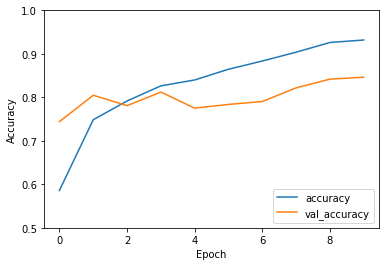

In [3]:
if __name__ == "__main__" :
        main()